# Lab 3
## More EDA: improving expertise in loading, cleaning, and analyzing data

The objective of Lab 3 is for you to become more proficient in obtaining and working with different types of data. A particular emphasis will be on dealing with text data.

This lab assignment will have 3 components. 

## Lab 3.A. Complete tutorials from Harvard's CS109 Lab 1

Go to https://github.com/cs109/2015lab1 and download the following files in your local Lab3 directory:
- https://github.com/cs109/2015lab1/blob/master/Lab1-babypython.ipynb
- https://github.com/cs109/2015lab1/blob/master/Lab1-pythonpandas.ipynb
- https://github.com/cs109/2015lab1/blob/master/all.csv

Study all the code and run every block of code from the *babypython* tutorial. It covers many of the things you already learned in your Labs 1 and 2, so it is a good refresher. However, there are some new things. In particular, you will learn how to load a pure textual file and process it to find counts of all the unique words (also called the tokens) in the text. When going over this tutorial, you can disregard the following blocks of code: 10, 11, 21-23.

Study all the code and run every block of code from the *pythonpandas* tutorial. Again, you will find there many things you already know. However, the novelty here is in processing and analysis of a slightly messy tabular data than was the case with the *Auto MPG data*. When going over this code you can disregard code block 24.

**Deliverable**: submit the two .ipynb files after you have run all the lines of code. We will appreciate if we see that you put some extra effort, such as trying to modify existing code, enter new lines of code, or provide comments in the text. Make sure any modifications are easily visible by us for the grading purposes.

## Lab 3.B. Movie Lens Data

In this part of the lab, you will be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze MoviLens data, which contains ratings of multiple movies by multiple users.

**The MovieLens data**

http://grouplens.org/datasets/movielens/

Take some time to learn about the data, because it will be helpful to do the assignment.


In [101]:
## all imports
from IPython.display import HTML
import numpy as np
import urllib2
import bs4 #this is beautiful soup
import time
import operator
import socket
import cPickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [102]:
# Read the user data:
#   pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']

users = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.user', 
    sep='|', names=u_cols)

users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [103]:
# Read the ratings:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.data', 
    sep='\t', names=r_cols)

ratings.head() 

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [104]:
# Read the movies data
#  the movies file contains columns indicating the movie's genres
#  let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 
            'video_release_date', 'imdb_url']

movies = pd.read_csv(
    'http://files.grouplens.org/datasets/movielens/ml-100k/u.item', 
    sep='|', names=m_cols, usecols=range(5))

movies.head()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


Get information about the data:

In [157]:
print movies.dtypes
print
print movies.describe()
# *** Why only those two columns? ***

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

          movie_id  video_release_date
count  1682.000000                 0.0
mean    841.500000                 NaN
std     485.695893                 NaN
min       1.000000                 NaN
25%     421.250000                 NaN
50%     841.500000                 NaN
75%    1261.750000                 NaN
max    1682.000000                 NaN


Selecting data:

* DataFrame => group of Series with shared index
* single DataFrame column => Series

In [106]:
users.head()
users['occupation'].head()
## *** Where did the nice design go? ***
columns_you_want = ['occupation', 'sex'] 
users[columns_you_want].head()

print users.head()

print users.iloc[3]

   user_id  age sex  occupation zip_code
0        1   24   M  technician    85711
1        2   53   F       other    94043
2        3   23   M      writer    32067
3        4   24   M  technician    43537
4        5   33   F       other    15213
user_id                4
age                   24
sex                    M
occupation    technician
zip_code           43537
Name: 3, dtype: object


Filtering data:

Select users older than 25

In [107]:
oldUsers = users[users.age > 25]
oldUsers.head()

,user_id,age,sex,occupation,zip_code
1,2,53,F,other,94043
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201


**Question 1**: 
* show users aged 40 and male
* show the mean age of female programmers

In [108]:
# users aged 40 AND male
# your code here
olderMen = users[(users.age > 40) & (users.sex == 'M')]
print olderMen.head()
## users who are female and programmers
# your code here
femmeCoders = users[(users.sex == 'F') & (users.occupation == 'programmer')]
print femmeCoders.head()
## show statistic summary or compute mean
# your code here
print femmeCoders.describe()
print olderMen.describe()

    user_id  age sex     occupation zip_code
5         6   42   M      executive    98101
6         7   57   M  administrator    91344
9        10   53   M         lawyer    90703
12       13   47   M       educator    29206
13       14   45   M      scientist    55106
     user_id  age sex  occupation zip_code
291      292   35   F  programmer    94703
299      300   26   F  programmer    55106
351      352   37   F  programmer    55105
403      404   29   F  programmer    55108
420      421   38   F  programmer    55105
          user_id        age
count    6.000000   6.000000
mean   411.166667  32.166667
std    149.987222   5.115336
min    292.000000  26.000000
25%    313.000000  28.250000
50%    378.000000  32.000000
75%    416.750000  36.500000
max    698.000000  38.000000
          user_id         age
count  189.000000  189.000000
mean   461.746032   50.677249
std    275.549797    7.287162
min      6.000000   41.000000
25%    208.000000   45.000000
50%    454.000000   49.000000
7

Find Diligent Users

- split data per user ID
- count ratings
- combine result



In [162]:
print ratings.head()
## split data
grouped_data = ratings.groupby('user_id')
#grouped_data = ratings['movie_id'].groupby(ratings['user_id'])

## count and combine
ratings_per_user = grouped_data.count()

ratings_per_user.head(5)

   user_id  movie_id  rating  unix_timestamp
0      196       242       3       881250949
1      186       302       3       891717742
2       22       377       1       878887116
3      244        51       2       880606923
4      166       346       1       886397596


,movie_id,rating,unix_timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175


**Question 2**:
* get the average rating per movie
* advanced: get the movie titles with the highest average rating

In [216]:
## split data
# your code here
grouped_data = ratings.groupby('movie_id')

## average and combine
# your code here
average_ratings = grouped_data.agg({'rating': [np.mean]})
print average_ratings.head(5)

# get the maximum rating
# your code here
print average_ratings.sort_values([('rating', 'mean')], ascending = False).head(1)

# get movie ids with that rating
# your code here
print "Good movie ids:"
print #your code here
good_ids = average_ratings[average_ratings['rating']['mean'] == 5]
print good_ids

print "Best movie titles"
print # your code here
ids = five_star_films.index.values
for movie_id in ids:
    print movies[movies.movie_id == movie_id].title

# get number of ratings per movie
# your code here
print "Number of ratings per movie"
print # your code here
rating_count = grouped_data.count()
for id in rating_count.index.values:
    print str(movies[movies.movie_id == id].title) + str(rating_count[rating_count.index == id].user_id)

            rating
              mean
movie_id          
1         3.878319
2         3.206107
3         3.033333
4         3.550239
5         3.302326
         rating
           mean
movie_id       
814         5.0
Good movie ids:

         rating
           mean
movie_id       
814         5.0
1122        5.0
1189        5.0
1201        5.0
1293        5.0
1467        5.0
1500        5.0
1536        5.0
1599        5.0
1653        5.0
Best movie titles

[ 814 1122 1189 1201 1293 1467 1500 1536 1599 1653]
813    Great Day in Harlem, A (1994)
Name: title, dtype: object
1121    They Made Me a Criminal (1939)
Name: title, dtype: object
1188    Prefontaine (1997)
Name: title, dtype: object
1200    Marlene Dietrich: Shadow and Light (1996) 
Name: title, dtype: object
1292    Star Kid (1997)
Name: title, dtype: object
1466    Saint of Fort Washington, The (1993)
Name: title, dtype: object
1499    Santa with Muscles (1996)
Name: title, dtype: object
1535    Aiqing wansui (1994)
Name: title, 

89    So I Married an Axe Murderer (1993)
Name: title, dtype: objectmovie_id
90    95
Name: user_id, dtype: int64
90    Nightmare Before Christmas, The (1993)
Name: title, dtype: objectmovie_id
91    143
Name: user_id, dtype: int64
91    True Romance (1993)
Name: title, dtype: objectmovie_id
92    104
Name: user_id, dtype: int64
92    Welcome to the Dollhouse (1995)
Name: title, dtype: objectmovie_id
93    112
Name: user_id, dtype: int64
93    Home Alone (1990)
Name: title, dtype: objectmovie_id
94    137
Name: user_id, dtype: int64
94    Aladdin (1992)
Name: title, dtype: objectmovie_id
95    219
Name: user_id, dtype: int64
95    Terminator 2: Judgment Day (1991)
Name: title, dtype: objectmovie_id
96    295
Name: user_id, dtype: int64
96    Dances with Wolves (1990)
Name: title, dtype: objectmovie_id
97    256
Name: user_id, dtype: int64
97    Silence of the Lambs, The (1991)
Name: title, dtype: objectmovie_id
98    390
Name: user_id, dtype: int64
98    Snow White and the Seven Dwarfs

195    Dead Poets Society (1989)
Name: title, dtype: objectmovie_id
196    251
Name: user_id, dtype: int64
196    Graduate, The (1967)
Name: title, dtype: objectmovie_id
197    239
Name: user_id, dtype: int64
197    Nikita (La Femme Nikita) (1990)
Name: title, dtype: objectmovie_id
198    127
Name: user_id, dtype: int64
198    Bridge on the River Kwai, The (1957)
Name: title, dtype: objectmovie_id
199    165
Name: user_id, dtype: int64
199    Shining, The (1980)
Name: title, dtype: objectmovie_id
200    206
Name: user_id, dtype: int64
200    Evil Dead II (1987)
Name: title, dtype: objectmovie_id
201    89
Name: user_id, dtype: int64
201    Groundhog Day (1993)
Name: title, dtype: objectmovie_id
202    280
Name: user_id, dtype: int64
202    Unforgiven (1992)
Name: title, dtype: objectmovie_id
203    182
Name: user_id, dtype: int64
203    Back to the Future (1985)
Name: title, dtype: objectmovie_id
204    350
Name: user_id, dtype: int64
204    Patton (1970)
Name: title, dtype: objectmovi

290    Absolute Power (1997)
Name: title, dtype: objectmovie_id
291    127
Name: user_id, dtype: int64
291    Rosewood (1997)
Name: title, dtype: objectmovie_id
292    114
Name: user_id, dtype: int64
292    Donnie Brasco (1997)
Name: title, dtype: objectmovie_id
293    147
Name: user_id, dtype: int64
293    Liar Liar (1997)
Name: title, dtype: objectmovie_id
294    485
Name: user_id, dtype: int64
294    Breakdown (1997)
Name: title, dtype: objectmovie_id
295    77
Name: user_id, dtype: int64
295    Promesse, La (1996)
Name: title, dtype: objectmovie_id
296    6
Name: user_id, dtype: int64
296    Ulee's Gold (1997)
Name: title, dtype: objectmovie_id
297    50
Name: user_id, dtype: int64
297    Face/Off (1997)
Name: title, dtype: objectmovie_id
298    194
Name: user_id, dtype: int64
298    Hoodlum (1997)
Name: title, dtype: objectmovie_id
299    73
Name: user_id, dtype: int64
299    Air Force One (1997)
Name: title, dtype: objectmovie_id
300    431
Name: user_id, dtype: int64
300    In &

382    Flintstones, The (1994)
Name: title, dtype: objectmovie_id
383    31
Name: user_id, dtype: int64
383    Naked Gun 33 1/3: The Final Insult (1994)
Name: title, dtype: objectmovie_id
384    69
Name: user_id, dtype: int64
384    True Lies (1994)
Name: title, dtype: objectmovie_id
385    208
Name: user_id, dtype: int64
385    Addams Family Values (1993)
Name: title, dtype: objectmovie_id
386    87
Name: user_id, dtype: int64
386    Age of Innocence, The (1993)
Name: title, dtype: objectmovie_id
387    65
Name: user_id, dtype: int64
387    Beverly Hills Cop III (1994)
Name: title, dtype: objectmovie_id
388    28
Name: user_id, dtype: int64
388    Black Beauty (1994)
Name: title, dtype: objectmovie_id
389    27
Name: user_id, dtype: int64
389    Fear of a Black Hat (1993)
Name: title, dtype: objectmovie_id
390    10
Name: user_id, dtype: int64
390    Last Action Hero (1993)
Name: title, dtype: objectmovie_id
391    59
Name: user_id, dtype: int64
391    Man Without a Face, The (1993)
N

466    Bronx Tale, A (1993)
Name: title, dtype: objectmovie_id
467    48
Name: user_id, dtype: int64
467    Rudy (1993)
Name: title, dtype: objectmovie_id
468    64
Name: user_id, dtype: int64
468    Short Cuts (1993)
Name: title, dtype: objectmovie_id
469    67
Name: user_id, dtype: int64
469    Tombstone (1993)
Name: title, dtype: objectmovie_id
470    108
Name: user_id, dtype: int64
470    Courage Under Fire (1996)
Name: title, dtype: objectmovie_id
471    221
Name: user_id, dtype: int64
471    Dragonheart (1996)
Name: title, dtype: objectmovie_id
472    158
Name: user_id, dtype: int64
472    James and the Giant Peach (1996)
Name: title, dtype: objectmovie_id
473    126
Name: user_id, dtype: int64
473    Dr. Strangelove or: How I Learned to Stop Worr...
Name: title, dtype: objectmovie_id
474    194
Name: user_id, dtype: int64
474    Trainspotting (1996)
Name: title, dtype: objectmovie_id
475    250
Name: user_id, dtype: int64
475    First Wives Club, The (1996)
Name: title, dtype: o

563    Tales from the Hood (1995)
Name: title, dtype: objectmovie_id
564    27
Name: user_id, dtype: int64
564    Village of the Damned (1995)
Name: title, dtype: objectmovie_id
565    22
Name: user_id, dtype: int64
565    Clear and Present Danger (1994)
Name: title, dtype: objectmovie_id
566    179
Name: user_id, dtype: int64
566    Wes Craven's New Nightmare (1994)
Name: title, dtype: objectmovie_id
567    35
Name: user_id, dtype: int64
567    Speed (1994)
Name: title, dtype: objectmovie_id
568    230
Name: user_id, dtype: int64
568    Wolf (1994)
Name: title, dtype: objectmovie_id
569    67
Name: user_id, dtype: int64
569    Wyatt Earp (1994)
Name: title, dtype: objectmovie_id
570    50
Name: user_id, dtype: int64
570    Another Stakeout (1993)
Name: title, dtype: objectmovie_id
571    28
Name: user_id, dtype: int64
571    Blown Away (1994)
Name: title, dtype: objectmovie_id
572    29
Name: user_id, dtype: int64
572    Body Snatchers (1993)
Name: title, dtype: objectmovie_id
573    

Name: user_id, dtype: int64
664    Alien 3 (1992)
Name: title, dtype: objectmovie_id
665    100
Name: user_id, dtype: int64
665    Blood For Dracula (Andy Warhol's Dracula) (1974)
Name: title, dtype: objectmovie_id
666    5
Name: user_id, dtype: int64
666    Audrey Rose (1977)
Name: title, dtype: objectmovie_id
667    12
Name: user_id, dtype: int64
667    Blood Beach (1981)
Name: title, dtype: objectmovie_id
668    6
Name: user_id, dtype: int64
668    Body Parts (1991)
Name: title, dtype: objectmovie_id
669    13
Name: user_id, dtype: int64
669    Body Snatchers (1993)
Name: title, dtype: objectmovie_id
670    36
Name: user_id, dtype: int64
670    Bride of Frankenstein (1935)
Name: title, dtype: objectmovie_id
671    46
Name: user_id, dtype: int64
671    Candyman (1992)
Name: title, dtype: objectmovie_id
672    65
Name: user_id, dtype: int64
672    Cape Fear (1962)
Name: title, dtype: objectmovie_id
673    86
Name: user_id, dtype: int64
673    Cat People (1982)
Name: title, dtype: obje

Name: user_id, dtype: int64
771    Kids (1995)
Name: title, dtype: objectmovie_id
772    49
Name: user_id, dtype: int64
772    Mute Witness (1994)
Name: title, dtype: objectmovie_id
773    17
Name: user_id, dtype: int64
773    Prophecy, The (1995)
Name: title, dtype: objectmovie_id
774    32
Name: user_id, dtype: int64
774    Something to Talk About (1995)
Name: title, dtype: objectmovie_id
775    26
Name: user_id, dtype: int64
775    Three Wishes (1995)
Name: title, dtype: objectmovie_id
776    9
Name: user_id, dtype: int64
776    Castle Freak (1995)
Name: title, dtype: objectmovie_id
777    4
Name: user_id, dtype: int64
777    Don Juan DeMarco (1995)
Name: title, dtype: objectmovie_id
778    76
Name: user_id, dtype: int64
778    Drop Zone (1994)
Name: title, dtype: objectmovie_id
779    31
Name: user_id, dtype: int64
779    Dumb & Dumber (1994)
Name: title, dtype: objectmovie_id
780    69
Name: user_id, dtype: int64
780    French Kiss (1995)
Name: title, dtype: objectmovie_id
781    

870    Vegas Vacation (1997)
Name: title, dtype: objectmovie_id
871    75
Name: user_id, dtype: int64
871    Love Jones (1997)
Name: title, dtype: objectmovie_id
872    42
Name: user_id, dtype: int64
872    Picture Perfect (1997)
Name: title, dtype: objectmovie_id
873    81
Name: user_id, dtype: int64
873    Career Girls (1997)
Name: title, dtype: objectmovie_id
874    39
Name: user_id, dtype: int64
874    She's So Lovely (1997)
Name: title, dtype: objectmovie_id
875    53
Name: user_id, dtype: int64
875    Money Talks (1997)
Name: title, dtype: objectmovie_id
876    47
Name: user_id, dtype: int64
876    Excess Baggage (1997)
Name: title, dtype: objectmovie_id
877    52
Name: user_id, dtype: int64
877    That Darn Cat! (1997)
Name: title, dtype: objectmovie_id
878    33
Name: user_id, dtype: int64
878    Peacemaker, The (1997)
Name: title, dtype: objectmovie_id
879    136
Name: user_id, dtype: int64
879    Soul Food (1997)
Name: title, dtype: objectmovie_id
880    59
Name: user_id, dty

977    Heaven's Prisoners (1996)
Name: title, dtype: objectmovie_id
978    27
Name: user_id, dtype: int64
978    Trigger Effect, The (1996)
Name: title, dtype: objectmovie_id
979    35
Name: user_id, dtype: int64
979    Mother Night (1996)
Name: title, dtype: objectmovie_id
980    22
Name: user_id, dtype: int64
980    Dangerous Ground (1997)
Name: title, dtype: objectmovie_id
981    8
Name: user_id, dtype: int64
981    Maximum Risk (1996)
Name: title, dtype: objectmovie_id
982    20
Name: user_id, dtype: int64
982    Rich Man's Wife, The (1996)
Name: title, dtype: objectmovie_id
983    15
Name: user_id, dtype: int64
983    Shadow Conspiracy (1997)
Name: title, dtype: objectmovie_id
984    44
Name: user_id, dtype: int64
984    Blood & Wine (1997)
Name: title, dtype: objectmovie_id
985    22
Name: user_id, dtype: int64
985    Turbulence (1997)
Name: title, dtype: objectmovie_id
986    23
Name: user_id, dtype: int64
986    Underworld (1997)
Name: title, dtype: objectmovie_id
987    4
Name

1089    Sliver (1993)
Name: title, dtype: objectmovie_id
1090    37
Name: user_id, dtype: int64
1090    Pete's Dragon (1977)
Name: title, dtype: objectmovie_id
1091    43
Name: user_id, dtype: int64
1091    Dear God (1996)
Name: title, dtype: objectmovie_id
1092    12
Name: user_id, dtype: int64
1092    Live Nude Girls (1995)
Name: title, dtype: objectmovie_id
1093    23
Name: user_id, dtype: int64
1093    Thin Line Between Love and Hate, A (1996)
Name: title, dtype: objectmovie_id
1094    12
Name: user_id, dtype: int64
1094    High School High (1996)
Name: title, dtype: objectmovie_id
1095    29
Name: user_id, dtype: int64
1095    Commandments (1997)
Name: title, dtype: objectmovie_id
1096    3
Name: user_id, dtype: int64
1096    Hate (Haine, La) (1995)
Name: title, dtype: objectmovie_id
1097    18
Name: user_id, dtype: int64
1097    Flirting With Disaster (1996)
Name: title, dtype: objectmovie_id
1098    42
Name: user_id, dtype: int64
1098    Red Firecracker, Green Firecracker (1994)

1189    That Old Feeling (1997)
Name: title, dtype: objectmovie_id
1190    11
Name: user_id, dtype: int64
1190    Letter From Death Row, A (1998)
Name: title, dtype: objectmovie_id
1191    3
Name: user_id, dtype: int64
1191    Boys of St. Vincent, The (1993)
Name: title, dtype: objectmovie_id
1192    13
Name: user_id, dtype: int64
1192    Before the Rain (Pred dozhdot) (1994)
Name: title, dtype: objectmovie_id
1193    10
Name: user_id, dtype: int64
1193    Once Were Warriors (1994)
Name: title, dtype: objectmovie_id
1194    31
Name: user_id, dtype: int64
1194    Strawberry and Chocolate (Fresa y chocolate) (...
Name: title, dtype: objectmovie_id
1195    11
Name: user_id, dtype: int64
1195    Savage Nights (Nuits fauves, Les) (1992)
Name: title, dtype: objectmovie_id
1196    3
Name: user_id, dtype: int64
1196    Family Thing, A (1996)
Name: title, dtype: objectmovie_id
1197    45
Name: user_id, dtype: int64
1197    Purple Noon (1960)
Name: title, dtype: objectmovie_id
1198    7
Name: us

1284    Princess Caraboo (1994)
Name: title, dtype: objectmovie_id
1285    15
Name: user_id, dtype: int64
1285    Shall We Dance? (1937)
Name: title, dtype: objectmovie_id
1286    17
Name: user_id, dtype: int64
1286    Ed (1996)
Name: title, dtype: objectmovie_id
1287    6
Name: user_id, dtype: int64
1287    Denise Calls Up (1995)
Name: title, dtype: objectmovie_id
1288    7
Name: user_id, dtype: int64
1288    Jack and Sarah (1995)
Name: title, dtype: objectmovie_id
1289    7
Name: user_id, dtype: int64
1289    Country Life (1994)
Name: title, dtype: objectmovie_id
1290    2
Name: user_id, dtype: int64
1290    Celtic Pride (1996)
Name: title, dtype: objectmovie_id
1291    15
Name: user_id, dtype: int64
1291    Simple Wish, A (1997)
Name: title, dtype: objectmovie_id
1292    3
Name: user_id, dtype: int64
1292    Star Kid (1997)
Name: title, dtype: objectmovie_id
1293    3
Name: user_id, dtype: int64
1293    Ayn Rand: A Sense of Life (1997)
Name: title, dtype: objectmovie_id
1294    7
Na

1393    Swept from the Sea (1997)
Name: title, dtype: objectmovie_id
1394    7
Name: user_id, dtype: int64
1394    Hurricane Streets (1998)
Name: title, dtype: objectmovie_id
1395    6
Name: user_id, dtype: int64
1395    Stonewall (1995)
Name: title, dtype: objectmovie_id
1396    5
Name: user_id, dtype: int64
1396    Of Human Bondage (1934)
Name: title, dtype: objectmovie_id
1397    5
Name: user_id, dtype: int64
1397    Anna (1996)
Name: title, dtype: objectmovie_id
1398    2
Name: user_id, dtype: int64
1398    Stranger in the House (1997)
Name: title, dtype: objectmovie_id
1399    7
Name: user_id, dtype: int64
1399    Picture Bride (1995)
Name: title, dtype: objectmovie_id
1400    10
Name: user_id, dtype: int64
1400    M. Butterfly (1993)
Name: title, dtype: objectmovie_id
1401    18
Name: user_id, dtype: int64
1401    Ciao, Professore! (1993)
Name: title, dtype: objectmovie_id
1402    4
Name: user_id, dtype: int64
1402    Caro Diario (Dear Diary) (1994)
Name: title, dtype: objectmovi

Name: user_id, dtype: int64
1509    Mad Dog Time (1996)
Name: title, dtype: objectmovie_id
1510    1
Name: user_id, dtype: int64
1510    Children of the Revolution (1996)
Name: title, dtype: objectmovie_id
1511    5
Name: user_id, dtype: int64
1511    World of Apu, The (Apur Sansar) (1959)
Name: title, dtype: objectmovie_id
1512    6
Name: user_id, dtype: int64
1512    Sprung (1997)
Name: title, dtype: objectmovie_id
1513    3
Name: user_id, dtype: int64
1513    Dream With the Fishes (1997)
Name: title, dtype: objectmovie_id
1514    7
Name: user_id, dtype: int64
1514    Wings of Courage (1995)
Name: title, dtype: objectmovie_id
1515    1
Name: user_id, dtype: int64
1515    Wedding Gift, The (1994)
Name: title, dtype: objectmovie_id
1516    3
Name: user_id, dtype: int64
1516    Race the Sun (1996)
Name: title, dtype: objectmovie_id
1517    5
Name: user_id, dtype: int64
1517    Losing Isaiah (1995)
Name: title, dtype: objectmovie_id
1518    12
Name: user_id, dtype: int64
1518    New Jers

Name: user_id, dtype: int64
1588    Schizopolis (1996)
Name: title, dtype: objectmovie_id
1589    4
Name: user_id, dtype: int64
1589    To Have, or Not (1995)
Name: title, dtype: objectmovie_id
1590    2
Name: user_id, dtype: int64
1590    Duoluo tianshi (1995)
Name: title, dtype: objectmovie_id
1591    6
Name: user_id, dtype: int64
1591    Magic Hour, The (1998)
Name: title, dtype: objectmovie_id
1592    5
Name: user_id, dtype: int64
1592    Death in Brunswick (1991)
Name: title, dtype: objectmovie_id
1593    1
Name: user_id, dtype: int64
1593    Everest (1998)
Name: title, dtype: objectmovie_id
1594    2
Name: user_id, dtype: int64
1594    Shopping (1994)
Name: title, dtype: objectmovie_id
1595    1
Name: user_id, dtype: int64
1595    Nemesis 2: Nebula (1995)
Name: title, dtype: objectmovie_id
1596    1
Name: user_id, dtype: int64
1596    Romper Stomper (1992)
Name: title, dtype: objectmovie_id
1597    5
Name: user_id, dtype: int64
1597    City of Industry (1997)
Name: title, dtype: 

**Question 3**:
* get the average rating per user
* list all occupations and if they are male or female dominant

In [125]:
# get the average rating per user
# your code here
grouped_data = ratings.groupby('user_id')
average_review = grouped_data.mean()
print average_review.head(5)
# list all occupations and if they are male or female dominant
# your code here
grouped_data = users.groupby(['occupation', 'sex'])
occupation_count = grouped_data.count()
print occupation_count

print 'number of male users: '
print sum(users['sex'] == 'M')

print 'number of female users: '
print sum(users['sex'] == 'F')

           movie_id    rating  unix_timestamp
user_id                                      
1        136.500000  3.610294    8.773916e+08
2        249.500000  3.709677    8.886204e+08
3        318.814815  2.796296    8.892372e+08
4        291.041667  4.333333    8.920028e+08
5        291.291429  2.874286    8.762081e+08
                   user_id  age  zip_code
occupation    sex                        
administrator F         36   36        36
              M         43   43        43
artist        F         13   13        13
              M         15   15        15
doctor        M          7    7         7
educator      F         26   26        26
              M         69   69        69
engineer      F          2    2         2
              M         65   65        65
entertainment F          2    2         2
              M         16   16        16
executive     F          3    3         3
              M         29   29        29
healthcare    F         11   11        11
      

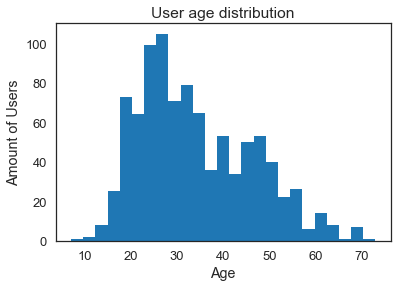

In [146]:
plt.hist(users['age'], bins = 25);
plt.title('User age distribution')
plt.xlabel('Age')
plt.ylabel('Amount of Users')
plt.savefig('age distribution')

In [232]:
#Most popular movies in general
#Popular movies by age
#Age distribution
#Ratings by age

#merge the data
# movie_ratings = pd.merge(movies, ratings)
# movie_data = pd.merge(movie_ratings, users)

# print movie_data.title.value_counts()[:10]
# print movie_data[movie_data['age'] > 60].groupby('title').size().sort_values(ascending=False)[:10]

**Question 4**:
- produce a 1-page document that uses a combination of text, tables, and figures that provide some interesting insights about the Movie Lens data. You should feel free to use outside sources to produce the report, as long as you acknowledge your sources. 

## Lab 3.C. HTML Data

In this part of the lab, you will be also be working on an exercise that is a slightly modified and shortened version of https://github.com/cs109/2015/blob/master/Lectures/02-DataScrapingQuizzes.ipynb. In particular, you will learn how to load and analyze html data.

HTML:
* HyperText Markup Language
* standard for creating webpages
* HTML tags 
    - have angle brackets
    - typically come in pairs


In [ ]:
htmlString = """<!DOCTYPE html>
<html>
  <head>
    <title>This is a title</title>
  </head>
  <body>
    <h2> Test </h2>
    <p>Hello world!</p>
  </body>
</html>"""

htmlOutput = HTML(htmlString)
htmlOutput

Useful Tags:

* heading
`<h1></h1> ... <h6></h6>`

* paragraph
`<p></p>` 

* line break
`<br>` 

* link with attribute

`<a href="http://www.example.com/">An example link</a>`

### Scraping with Python:

Example of a simple webpage: http://www.crummy.com/software/BeautifulSoup

Good news: 
    - some browsers help
    - look for: inspect element
    - need only basic html
    - try 'Ctrl-Shift I' in Chrome
    - try 'Command-Option I' in Safari
   
Different useful libraries:
    - urllib
    - beautifulsoup
    - pattern
    - soupy
    - LXML
    - ...
 
The following cell just defines a url as a string and then reads the data from that url using the `urllib` library. If you uncomment the print command you see that we got the whole HTML content of the page into the string variable source.

In [233]:
url = 'http://www.crummy.com/software/BeautifulSoup'
source = urllib2.urlopen(url).read()
print source

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"
"http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link rev="made" href="mailto:leonardr@segfault.org">
<link rel="stylesheet" type="text/css" href="/nb/themes/Default/nb.css">
<meta name="Description" content="Beautiful Soup: a library designed for screen-scraping HTML and XML.">
<meta name="generator" content="Markov Approximation 1.4 (module: leonardr)">
<meta name="author" content="Leonard Richardson">
</head>
<body bgcolor="white" text="black" link="blue" vlink="660066" alink="red">
<img align="right" src="10.1.jpg" width="250"><br />

<p>You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.</p>

<

**Question 5**:

* Is the word 'Alice' mentioned on the beautiful soup homepage?
* How often does the word 'Soup' occur on the site?
    - hint: use `.count()`
* At what index occurs the substring 'alien video games' ?
    - hint: use `.find()`

In [237]:
## is 'Alice' in source?
print 'alice' in source
## count occurences of 'Soup'
print source.count('Soup')
## find index of 'alien video games'
print source.find('alien video games')

False
43
-1


**Beautiful Soup**

* designed to make your life easier
* many good functions for parsing html code

Some examples:

In [325]:
## get bs4 object
soup = bs4.BeautifulSoup(source)

## compare the two print statements
# print soup
print soup.prettify()

## show how to find all a tags
soup.findAll('a')

## ***Why does this not work? ***
# print soup.findAll('Soup')
#Because there is no soup html tag

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <img align="right" src="10.1.jpg" width="250"/>
  <br/>
  <p>
   You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-tur

[<a href="bs4/download/"><h1>Beautiful Soup</h1></a>,
 <a href="#Download">Download</a>,
 <a href="bs4/doc/">Documentation</a>,
 <a href="#HallOfFame">Hall of Fame</a>,
 <a href="https://code.launchpad.net/beautifulsoup">Source</a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">Discussion group</a>,
 <a href="zine/">Zine</a>,
 <a href="zine/"><i>Tool Safety</i></a>,
 <a href="https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup">the discussion\ngroup</a>,
 <a href="https://bugs.launchpad.net/beautifulsoup/">file it</a>,
 <a href="http://lxml.de/">lxml</a>,
 <a href="http://code.google.com/p/html5lib/">html5lib</a>,
 <a href="bs4/doc/">Read more.</a>,
 <a name="Download"><h2>Download Beautiful Soup</h2></a>,
 <a href="bs4/download/">Beautiful Soup\n4.6.0</a>,
 <a href="http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html">Here's\nthe Beautiful Soup 3 documentation.</a>,
 <a href="download/3.x/BeautifulSoup-3.2.1.tar.gz">3.2.1</a>,

More examples:

In [252]:
## get attribute value from an element:
## find tag: this only returns the first occurrence, not all tags in the string
first_tag = soup.find('a')

## get attribute `href`
first_tag.get('href')

## get all links in the page
link_list = [l.get('href') for l in soup.findAll('a')]
link_list

['bs4/download/',
 '#Download',
 'bs4/doc/',
 '#HallOfFame',
 'https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'zine/',
 'zine/',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'bs4/doc/',
 None,
 'bs4/download/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'download/3.x/BeautifulSoup-3.2.1.tar.gz',
 None,
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/

In [253]:
## filter all external links
# create an empty list to collect the valid links
external_links = []

# write a loop to filter the links
# if it starts with 'http' we are happy
for l in link_list:
    if l[:4] == 'http':
        external_links.append(l)

# this throws an error! It says something about 'NoneType'

TypeError: 'NoneType' object has no attribute '__getitem__'

In [255]:
# lets investigate. Have a close look at the link_list:
link_list

# Seems that there are None elements!
# Let's verify
print sum([l is None for l in link_list])

# So there are two elements in the list that are None!

2


In [256]:
# Let's filter those objects out in the for loop
external_links = []

# write a loop to filter the links
# if it is not None and starts with 'http' we are happy
for l in link_list:
    if l is not None and l[:4] == 'http':
        external_links.append(l)
        
external_links

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beautifulsoup',
 'https://code.launchpad.net/beautifulsoup/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.org/licens

*Note*: The above `if` condition works because of lazy evaluation in Python. The `and` statement becomes `False` if the first part is `False`, so there is no need to ever evaluate the second part. Thus a `None` entry in the list gets never asked about its first four characters. 

In [257]:
# and we can put this in a list comprehension as well, it almost reads like 
# a sentence.

[l for l in link_list if l is not None and l.startswith('http')]

['https://code.launchpad.net/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://lxml.de/',
 'http://code.google.com/p/html5lib/',
 'http://www.crummy.com/software/BeautifulSoup/bs3/documentation.html',
 'http://www.nytimes.com/2007/10/25/arts/design/25vide.html',
 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py',
 'http://www.harrowell.org.uk/viktormap.html',
 'http://svn.python.org/view/tracker/importer/',
 'http://www2.ljworld.com/',
 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/',
 'http://esrl.noaa.gov/gsd/fab/',
 'http://laps.noaa.gov/topograbber/',
 'http://groups.google.com/group/beautifulsoup/',
 'https://launchpad.net/beautifulsoup',
 'https://code.launchpad.net/beautifulsoup/',
 'https://bugs.launchpad.net/beautifulsoup/',
 'http://creativecommons.org/licens

Parsing the Tree:

In [328]:
# redifining `s` without any line breaks
s = """<!DOCTYPE html><html><head><title>This is a title</title></head><body><h3> Test </h3><p>Hello world!</p></body></html>"""
## get bs4 object
tree = bs4.BeautifulSoup(s)

## get html root node
root_node = tree.html

## get head from root using contents
head = root_node.contents[0]

## get body from root
body = root_node.contents[1]

## could directly access body
tree.body

<body><h3> Test </h3><p>Hello world!</p></body>

**Question 6**:

* Find the `h3` tag by parsing the tree starting at `body`
* Create a list of all __Hall of Fame__ entries listed on the Beautiful Soup webpage
    - hint: it is the only unordered list in the page (tag `ul`)

In [281]:
## get h3 tag from body
body.contents[0]

## use ul as entry point


## get hall of fame list from entry point
## skip the first entry 

## reformat into a list containing strings
## it is ok to have a list of lists
ul = soup.find('ul');

tmp = [l.get('href') for l in ul.findAll('a')];
print tmp

['http://www.nytimes.com/2007/10/25/arts/design/25vide.html', 'https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py', 'http://www.harrowell.org.uk/viktormap.html', 'http://svn.python.org/view/tracker/importer/', 'http://www2.ljworld.com/', 'http://www.b-list.org/weblog/2010/nov/02/news-done-broke/', 'http://esrl.noaa.gov/gsd/fab/', 'http://laps.noaa.gov/topograbber/']


`tmp` now is actually a list of lists containing the hall of fame entries. 
Here is some advanced Python on how to print really just one entry per list item.

The cool things about this are: 
* The use of `""` to just access the `join` function of strings.
* The `join` function itself
* that you can actually have two nested for loops in a list comprehension

In [282]:
test =  ["".join(str(a) for a in sublist) for sublist in tmp]
print '\n'.join(test)

http://www.nytimes.com/2007/10/25/arts/design/25vide.html
https://github.com/reddit/reddit/blob/85f9cff3e2ab9bb8f19b96acd8da4ebacc079f04/r2/r2/lib/media.py
http://www.harrowell.org.uk/viktormap.html
http://svn.python.org/view/tracker/importer/
http://www2.ljworld.com/
http://www.b-list.org/weblog/2010/nov/02/news-done-broke/
http://esrl.noaa.gov/gsd/fab/
http://laps.noaa.gov/topograbber/


**Question 7**:
- Explain in detail what is Python doing in the previous line

**Answer**:
- It is parsing and nicely printing each entry, using some of the nice string utilities by using "" and a nested for loop. After that, it prints each link on a new line

**Question 8**:
- Plot a histogram of the count of the 20 most common words in the html file
- Plot a histogram of the count of the 20 most common words in the visible part (what is displayed in the browser) of the html file

**Deliverable**: For Lab 3.B and 3.C submit a modified version fo this .ipynb file that contains all the answers to the quesitons

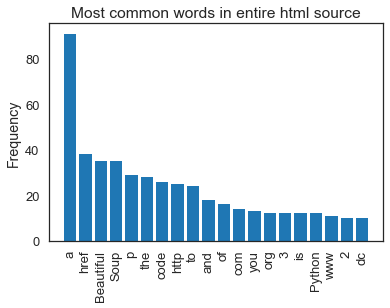

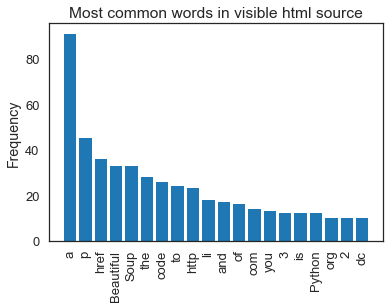

In [333]:
from collections import Counter

words = re.findall(r'\w+', source) #This finds words in the document
word_counts = Counter(words)
most_common = word_counts.most_common(20)
most_common.sort(key=lambda x: x[1], reverse=True) 
words = zip(*most_common)[0]
freq = zip(*most_common)[1]
x_pos = np.arange(len(words)) 

plt.bar(x_pos, freq,align='center')
plt.xticks(x_pos, words) 
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Most common words in entire html source')
plt.show()

tree = bs4.BeautifulSoup(source)

words = re.findall(r'\w+', str(tree.body)) #This finds words in the document
word_counts = Counter(words)
most_common = word_counts.most_common(20)
most_common.sort(key=lambda x: x[1], reverse=True) 
words = zip(*most_common)[0]
freq = zip(*most_common)[1]
x_pos = np.arange(len(words)) 

plt.bar(x_pos, freq,align='center')
plt.xticks(x_pos, words) 
plt.ylabel('Frequency')
plt.xticks(rotation = 90)
plt.title('Most common words in visible html source')
plt.show()

